In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from terminalvelocitysolver import PSIModeTV

from ipywidgets import IntProgress
from IPython.display import display


# Polydisperse Streaming Instability #

## Dispersion relation ##

We are looking at a simplified version of the polydisperse streaming instability (PSI), see [this paper](https://arxiv.org/pdf/2010.01145). In particular, we will use the terminal velocity approximation, where all dust particles instantly reach their terminal velocity. This leads to a relatively simple dispersion relation given by equation (40) in the paper (believe me: the full model is far worse!). For a given size density \$\sigma(a)\$, dust-to-gas ratio \$\mu\$ and wave numbers \$K_x\$ and \$K_z\$ we can use the dispersion relation to calculate the frequency \$\nu\$ of the corresponding mode. Since the perturbations are proportional to \$\exp(-i\nu \Omega t)\$, exponential growth occurs when \$\nu\$ has a *positive* imaginary part. Here \$\Omega\$ is the local Keplerian angular frequency. 

## Varying the parameters ##

There are a few limitations to keep in mind when varying the parameters. First of all, we restrict the size distribution to be a pure power law, therefore characterised by a single number that is the exponent. The default choice is \$\sigma \propto a^{-3.5}\$, which corresponds to the well-known [MRN size distribution](https://ui.adsabs.harvard.edu/abs/1977ApJ...217..425M/abstract). You can change the exponent to any [half integer](https://en.wikipedia.org/wiki/Half-integer), so \$-0.5\$, \$0.5\$, \$1.5\$, etc.

The terminal velocity approximation works best for small stopping times. The maximum is set to \$0.01\$ right now, best not to go much higher. The minimum can be as low as you want (as long as it stays positive). The dust-to-gas ratio should be positive, of course. 

## Growth rate as a function of wavenumbers ##

Below, the PSI is studied in the single size limit. What wave numbers give the fastest growth? What happens when you start to lower the minimum stopping time? How does the power law index of the size density affect this? How about dust-to-gas ratio?

IntProgress(value=0)

<IPython.core.display.Javascript object>


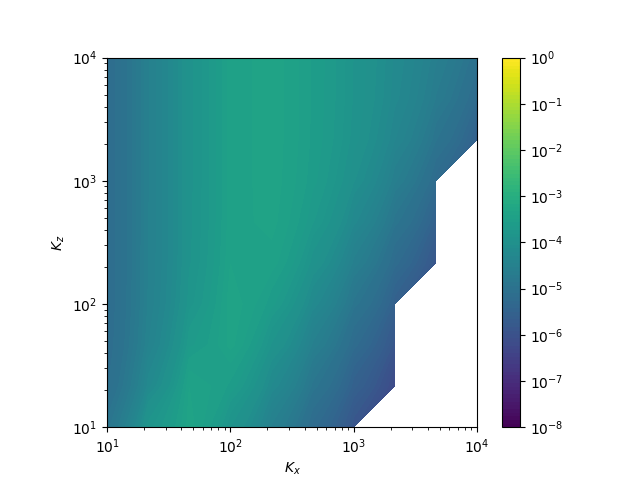

<ipython-input-2-25c49318ec10>:43: RuntimeWarning: divide by zero encountered in log10
  cs = ax.contourf(Kx, Kz, np.log10(np.transpose(np.imag(nu))), levels=l);


In [2]:
mu = 0.5                     # Dust to gas ratio
Kx = np.logspace(1,4,10)     # Wave numbers x
Kz = np.logspace(1,4,10)     # Wave numbers z
tau_min = 0.0099             # Minimum stopping time
tau_max = 0.01               # Maximum stopping time

# Terminal velocity solver
tv = PSIModeTV(mu, tau_max, power_law_exponent_size_distribution=-3.5, maximum_iterations=100)

# Make a progress bar for convenience
max_count = len(Kx)*len(Kz)
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

# Complex frequencies to be found
nu = np.zeros((len(Kx), len(Kz)), dtype=np.complex128)

# Loop through all wave numbers
for i in range(0, len(Kx)):
    for j in range(0, len(Kz)):        
        nu[i, j] = tv.find_roots_new(tau_min, Kx[i], Kz[j])
        f.value += 1 # signal to increment the progress bar

# Create a figure
fig, ax = plt.subplots(num='Growth rates 2D wave numbers')

# Logarithmic axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

ax.set_xlabel(r'$K_x$')
ax.set_ylabel(r'$K_z$')

# Define contour levels
min_growth = 1.0e-8
max_growth = 1.0
nlevels=100
l = np.linspace(np.log10(min_growth),
                np.log10(max_growth), nlevels)

# Plot growth rates
cs = ax.contourf(Kx, Kz, np.log10(np.transpose(np.imag(nu))), levels=l);

# Make a nice colorbar
ticks = np.linspace(np.log10(min_growth),
                    np.log10(max_growth), 9)
cbar = fig.colorbar(cs, ticks=ticks);
cbar.ax.set_yticklabels([r'$10^{{{:.0f}}}$'.format(x) for x in ticks]);

## One-dimensional plots ##

These 2D plots take a long time, as you have probably noticed. Next, we fix \$K_z=10000\$ and vary only \$K_x\$. This gives us curves that we can plot on top of each other. Below, we look at a single size (monodisperse) and compare it to a wide size distribution. Note the difference in growth rates but also most unstable wave number!   

IntProgress(value=0, max=200)

<IPython.core.display.Javascript object>


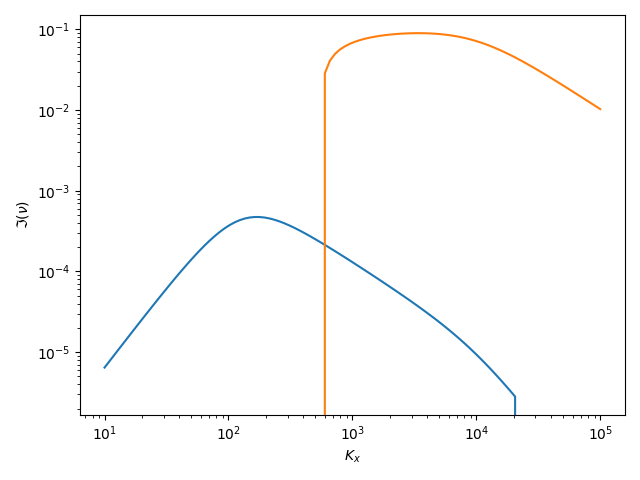

In [3]:
mu = 0.5
Kx = np.logspace(1,5,100)
Kz = 10000
tau_max = 0.01

beta = [-3.5, -3.5]
tau_min = [0.0099, 1.0e-8]

nu = np.zeros(len(Kx), dtype=np.complex128)

max_count2 = len(Kx)*len(beta)
f2 = IntProgress(min=0, max=max_count2) # instantiate the bar
display(f2) # display the bar

fig2, ax2 = plt.subplots(num='Test2')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_xlabel(r'$K_x$')
ax2.set_ylabel(r'$\Im(\nu)$')
 
for b, tm in zip(beta, tau_min):
    tv = PSIModeTV(mu, tau_max, power_law_exponent_size_distribution=b, maximum_iterations=10000)

    for i in range(0, len(Kx)):
        nu[i] = tv.find_roots_new(tm, Kx[i], Kz)
        f2.value += 1 # signal to increment the progress bar

    ax2.plot(Kx, np.imag(nu))

plt.tight_layout()

So the main question is: can we somehow make the PSI grow for similar wave numbers as the monodisperse SI?